# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)


In [2]:
import sklearn
sklearn.__version__

'0.24.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
#X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

import pandas as pd
data = pd.read_csv('https://datahub.io/machine-learning/mnist_784/r/mnist_784.csv')
data['class'] = data['class'].astype(str)
X = data.iloc[:,:-1].to_numpy()
Y = data.iloc[:,-1].to_numpy()

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

<Figure size 7840x7840 with 0 Axes>

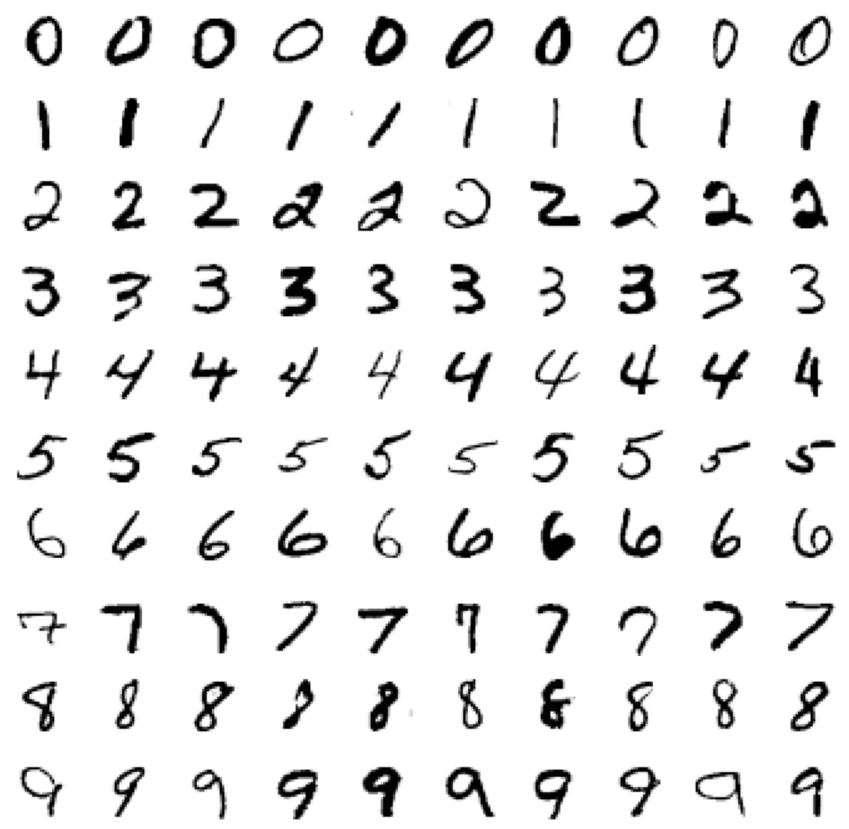

In [4]:
def P1(num_examples=10):

### STUDENT START ###

    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(num_examples,len(np.unique(Y))), dpi=X.shape[1])

    digits = np.unique(Y)
    num = 10
    dim = int(np.sqrt(X.shape[1]))

    fig, axs = plt.subplots(len(digits), num, figsize=(15,15))

    for i,d in enumerate(digits):
        for j in range(num):
            axs[i,j].imshow(X[Y==d][j].reshape((dim,dim)))
            axs[i,j].axis('off')            


### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
def P2(k_values):

### STUDENT START ###
 
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        dev_pred = model.predict(dev_data)
        score = model.score(dev_data, dev_labels) 
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))

        if k == 1:
            labels = np.unique(Y).astype(int).astype('S')
            print ('\n Precission, recall, F1 for each digit:')
            print (classification_report(dev_labels, dev_pred))        
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k=1, accuracy=88.40%

 Precission, recall, F1 for each digit:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3, accuracy=87.60%
k=5, accuracy=88.20%
k=7, accuracy=87.70%
k=9, accuracy=87.50%


ANSWER:For k=1, the most difficult digit to predict is '8' because '8' has the lowest F1-score, and F1-score reflects both pricission and recall.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    import random
    elapsed_times = []
    model = KNeighborsClassifier(n_neighbors=1)
    Z = np.column_stack((X,Y.T))

    for train_size in train_sizes:   
        number_of_rows = Z.shape[0]
        random_indices = np.random.choice(number_of_rows, size= train_size, replace=False)
        random_data = Z[random_indices, :]        

        labels = random_data[:,-1]
        data = np.delete(random_data, -1, 1)

        start = time.time()
        model.fit(data, labels)
        accuracies.append(model.score(dev_data, dev_labels))
        end = time.time()
        elapsed_times.append(end - start) 
 
    print(''.join(' When training size = {0:5d} :  model accuracy = {1:.3f} ; Elapsed time = {2:4.2f}\n'.format(x,y,z) for x,y,z in 
                  zip(train_sizes, accuracies, elapsed_times)))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

 When training size =   100 :  model accuracy = 0.676 ; Elapsed time = 0.02
 When training size =   200 :  model accuracy = 0.802 ; Elapsed time = 0.03
 When training size =   400 :  model accuracy = 0.841 ; Elapsed time = 0.03
 When training size =   800 :  model accuracy = 0.867 ; Elapsed time = 0.04
 When training size =  1600 :  model accuracy = 0.905 ; Elapsed time = 0.07
 When training size =  3200 :  model accuracy = 0.929 ; Elapsed time = 0.12
 When training size =  6400 :  model accuracy = 0.943 ; Elapsed time = 0.23
 When training size = 12800 :  model accuracy = 0.969 ; Elapsed time = 0.45
 When training size = 25600 :  model accuracy = 0.974 ; Elapsed time = 0.77



### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

Original model
R-squared of original: 0.41
accuracy of training set size = 60000 is 1.266
accuracy of training set size = 120000 is 1.694
accuracy of training set size = 1000000 is 7.970
-------------------
Level-log model
R-squared of log transform: 0.87
accuracy of training set size = 60000 is 1.724
accuracy of training set size = 120000 is 1.799
accuracy of training set size = 1000000 is 2.029
-------------------
Sqrt model
R-squared of sqrt transform: 0.61
accuracy of training set size = 60000 is 1.152
accuracy of training set size = 120000 is 1.300
accuracy of training set size = 1000000 is 2.257
-------------------
Loglog model
R-squared of log-log transform: 0.93
accuracy of training set size = 60000 is 1.026
accuracy of training set size = 120000 is 1.047
accuracy of training set size = 1000000 is 1.105
-------------------


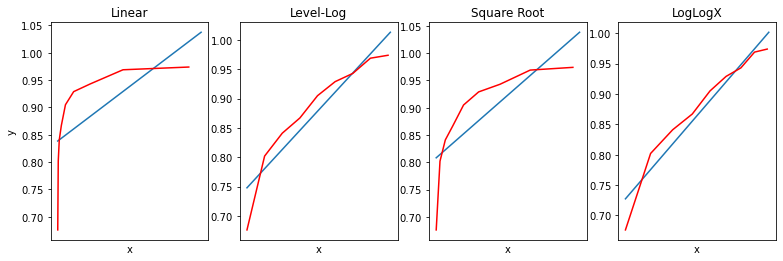

In [7]:
def P4():

### STUDENT START ###
    
    test_sizes = [60000, 120000 , 1000000]     
    labels =  [ Y[:60000], Y[:120000] , Y[:1000000] ] 

    # First we traspose the features (training set size) and labels (accuracy)
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)[:,np.newaxis]
    model = LinearRegression()
    model.fit(X, y)  
    print('Original model')
    print('R-squared of original: %.2f' % r2_score(y, model.predict(X)))
    for size in test_sizes:
        acc = model.predict([[size]])    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')

    plt.figure(figsize=(13, 4))
    ax = plt.subplot(1, 4, 1)
    plt.setp(ax, xticks=())
    x = np.linspace(X.min(), 28000, 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.plot(X, y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Linear')
 
    logX = np.log10(X)
    model.fit(logX, y)
    print('Level-log model')
    print('R-squared of log transform: %.2f' % r2_score(y, model.predict(logX)))
    for size in test_sizes:
        acc = model.predict(np.log([[size]]))    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')  
    ax = plt.subplot(1, 4, 2)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(X.min()), np.log10(28000), 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.plot(np.log10(X), y, color='red')
    plt.xlabel("x")
    plt.title('Level-Log')
 
    sqrtX = np.sqrt(X)
    model.fit(sqrtX, y)
    print('Sqrt model')
    print('R-squared of sqrt transform: %.2f' % r2_score(y, model.predict(sqrtX))) 
    for size in test_sizes:
        acc = model.predict(np.sqrt([[size]]))    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')  
    ax = plt.subplot(1, 4, 3)
    plt.setp(ax, xticks=())
    x = np.linspace(np.sqrt(X.min()), np.sqrt(28000), 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.plot(np.sqrt(X), y, color='red')
    plt.xlabel("x")
    plt.title('Square Root')
 
    loglogX = np.log10(np.log10(X))
    model.fit(loglogX, y)
    print('Loglog model')
    print('R-squared of log-log transform: %.2f' % r2_score(y, model.predict(loglogX)))
    for size in test_sizes:
        acc = model.predict(np.log10(np.log10([[size]])))    
        print('accuracy of training set size =', size, 'is %.3f' % acc)
    print('-------------------')  
    ax = plt.subplot(1, 4, 4)
    plt.setp(ax, xticks=())
  #  x = np.linspace(X.min(), 28000, 100)[:,np.newaxis]
    x = np.linspace(np.log10(np.log10(X.min())), np.log10(np.log10(28000)), 100)[:,np.newaxis]
    plt.plot(x, model.predict(x))
    plt.plot(np.log10(np.log10(X)), y, color='red')
    plt.xlabel("x")
    plt.title('LogLogX')

### STUDENT END ###

P4()

ANSWER:

What's wrong with using linear regression is the accuracies by the linear models sometimes are greater than 1.  This is not reasonable. Also the linear models did not fit well the data. 

In detail, my observation to the comparison of the accuracies of each model by using R^2 are: 
loglogX model (0.86)   > level-log model (0.80)  > Squre-root model (0.48) > origin model (0.32) 

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

the model confuse most often:
There are 11 cases in which the digit 4 is confused with the digit 9.
the digits are as the follows:



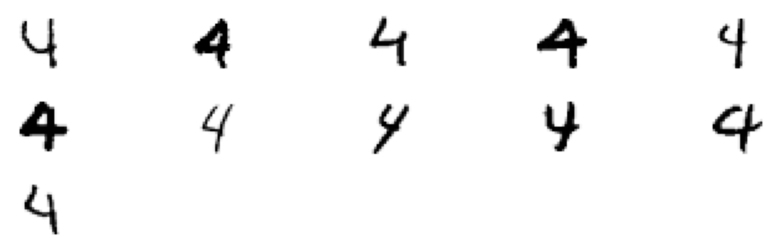

In [8]:
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


def P5():

### STUDENT START ###

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    Y = model.predict(dev_data)
    confusion = confusion_matrix(dev_labels, Y)
    print(confusion)
    
    np.fill_diagonal(confusion, 0)
    row, col = np.unravel_index(confusion.argmax(), confusion.shape)
    max = confusion.max()
    
    print('\n===========================================================')
    print('the model confuse most often:')
    print('There are {0:2d} cases in which the digit {1:d} is confused with the digit {2:d}.'.format(max,row, col))
    print('the digits are as the follows:')
    print('============================================================\n')
    
    confused_digit = []*max
    j = 0 
    for i in range(1000): 
        if (dev_labels[i] == str(row)) & (Y[i] == str(col) ):
            confused_digit.append(dev_data[i])
            j = j+1
               
    dim = int(np.sqrt(X.shape[1]))
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(15, 15))
    for k in range(len(confused_digit)):
        digit = confused_digit[k]
        plt.subplot(10, 5, k+1)
        plt.imshow(digit.reshape((dim,dim)))   
        plt.axis('off')
            
    
### STUDENT END ###

P5()

ANSWER: 

The model confuse most often: there are 11 cases in which the digit 4 is confused with the digit 9.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

Accuracies with scipy.ndimage.filtersare are shown as below: 
train mini_train_data and test dev_data, accuracy is: 0.884
train blurred_mini_train_data and test dev_data, accuracy is:   0.890
train mini_train_data and test blurred_dev_data, accuracy is:   0.880
train blurred_mini_train_data and test blurred_dev_data:     0.896
================:
Accuracies of the simplified Gaussian blur filter are shown as below: 
train mini_train_data and test dev_data, accuracy is: 0.884
train blurred_mini_train_data and test dev_data, accuracy is:   0.906
train mini_train_data and test blurred_dev_data, accuracy is:   0.868
train blurred_mini_train_data and test blurred_dev_data:     0.900


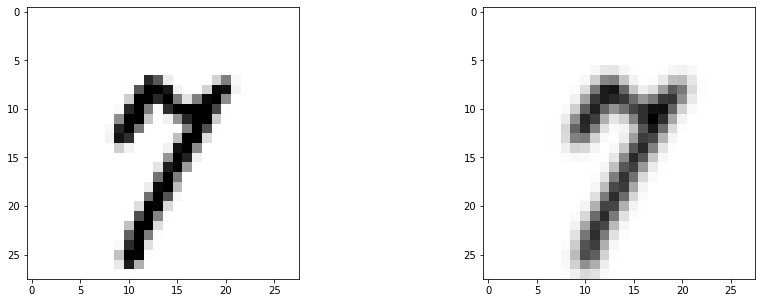

In [9]:
def P6():
    
### STUDENT START ###

# I firstly use scipy.ndimage.filters : 

    from scipy.ndimage import gaussian_filter
    model = KNeighborsClassifier(n_neighbors=1)
    blurred_train_data = np.apply_along_axis(gaussian_filter, 1, mini_train_data, 1)   
    blurred_dev_data = np.apply_along_axis(gaussian_filter, 1, dev_data, 1)
  
    print ('Accuracies with scipy.ndimage.filtersare are shown as below: ')   
    model.fit(mini_train_data, mini_train_labels)
    print ('train mini_train_data and test dev_data, accuracy is: {0:5.3f}'.format(model.score(dev_data, dev_labels)))                                                                                                                  
    model.fit(blurred_train_data, mini_train_labels)
    print ('train blurred_mini_train_data and test dev_data, accuracy is: {0:7.3f}'.format(model.score(dev_data, dev_labels)))                                                                                                            
    model.fit(mini_train_data, mini_train_labels)
    print ('train mini_train_data and test blurred_dev_data, accuracy is: {0:7.3f}'.format(model.score(blurred_dev_data, dev_labels)))
    model.fit(blurred_train_data, mini_train_labels)
    print ('train blurred_mini_train_data and test blurred_dev_data: {0:9.3f}'.format(model.score(blurred_dev_data, dev_labels)))
                                                                                                     

# I implement the simplified Gaussian blur filter described in this problem:  
 
    def gaussian_blur(image, sigma):
        dim = int(np.sqrt(len(image)))     
        blur_img = np.copy(image)
        
        pixels =np.zeros((dim,dim,2))        
        for i in range(pixels.shape[0]):
            for j in range(pixels.shape[1]): 
                pixels[i,j,0]= i
                pixels[i,j,1]= j
        
        get_neighbors = KNeighborsClassifier(n_neighbors=9)
        get_neighbors.fit(np.concatenate(pixels), np.zeros(dim*dim))
        
        for x in range(dim):
            for y in range(dim):
                neighbors = get_neighbors.kneighbors([[x, y]])
                weights = np.exp(-(np.square(neighbors[0])) / (2*np.square(sigma)))/(2*np.pi*np.square(sigma))
                weights = weights/weights.sum()
                blur_img[x*dim+y] = np.average(image[neighbors[1]], weights=weights.tolist())
        return blur_img

    
    dim = int(np.sqrt(X.shape[1]))
    random_image = X[np.random.choice(X.shape[0])]
    plt.rc('image', cmap='Greys')   
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.imshow(random_image.reshape(dim,dim))
    plt.subplot(1, 2, 2)
    plt.imshow(gaussian_blur(random_image,1).reshape(dim,dim))
    
    
    model = KNeighborsClassifier(n_neighbors=1)
    blurred_train_data = np.apply_along_axis(gaussian_blur, 1, mini_train_data, 1)   
    blurred_dev_data = np.apply_along_axis(gaussian_blur, 1, dev_data, 1)
    
    print ('================:') 
    print ('Accuracies of the simplified Gaussian blur filter are shown as below: ')   
    model.fit(mini_train_data, mini_train_labels)
    print ('train mini_train_data and test dev_data, accuracy is: {0:5.3f}'.format(model.score(dev_data, dev_labels)))                                                                                                                  
    model.fit(blurred_train_data, mini_train_labels)
    print ('train blurred_mini_train_data and test dev_data, accuracy is: {0:7.3f}'.format(model.score(dev_data, dev_labels)))                                                                                                            
    model.fit(mini_train_data, mini_train_labels)
    print ('train mini_train_data and test blurred_dev_data, accuracy is: {0:7.3f}'.format(model.score(blurred_dev_data, dev_labels)))
    model.fit(blurred_train_data, mini_train_labels)
    print ('train blurred_mini_train_data and test blurred_dev_data: {0:9.3f}'.format(model.score(blurred_dev_data, dev_labels)))

# Yes I get the best results with the simplified version Gaussian blur filter described above.                                                                                                     
   
### STUDENT END ###

P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

Accuracy of BernoulliNB: 0.814
Accuracy of Multinomial NB: 0.807


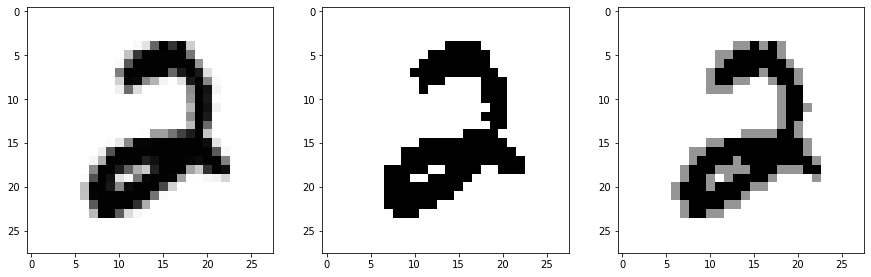

In [11]:
def P7():

### STUDENT START ###
 
    BNB_model = BernoulliNB(binarize= 0.1)
    BNB_model.fit(mini_train_data, mini_train_labels)
    print ('Accuracy of BernoulliNB: {0:.3f}'.format(BNB_model.score(dev_data, dev_labels)))
    
    MultinomialNB_model = MultinomialNB()
    processed_train_data = np.where((mini_train_data > 0.1) & (mini_train_data < 0.9), 
                                    1,np.where(mini_train_data > 0.1, 2, 0))
    processed_dev_data = np.where((dev_data > 0.1) & (dev_data < 0.9), 
                                  1, np.where(dev_data > 0.1, 2, 0))
 
    MultinomialNB_model.fit(processed_train_data, mini_train_labels)
    print ('Accuracy of Multinomial NB: {0:.3f}'.
           format(MultinomialNB_model.score(processed_dev_data, dev_labels)))
    
    dim = int(np.sqrt(X.shape[1]))
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(15,5))
    
    random_image = X[np.random.choice(X.shape[0])] 
    binarized_random_image = np.where(random_image < 0.5, 0, 1)
    trinarized_random_image = np.where((random_image > 0.1) & (random_image < 0.9), 1, 
                                       np.where(random_image > 0.1, 2, 0))
    
    plt.subplot(1, 3, 1)
    plt.imshow(random_image.reshape(dim,dim))
    plt.subplot(1, 3, 2)
    plt.imshow(binarized_random_image.reshape(dim,dim))
    plt.subplot(1, 3, 3)
    plt.imshow(trinarized_random_image.reshape(dim,dim))
    
    
### STUDENT END ###

P7()

ANSWER: 

Bernoulli models the presence/absence of a feature. Multinomial models the number of counts of a feature.  The binomial distribution generalises the Bernoulli distribution across the number of trials, the multinoulli distribution generalises it across the number of outcomes, that is, rolling a dice instead of tossing a coin.  Multinomial NB cares about counts for multiple features that do occur, whereas Bernoulli NB cares about counts for a single feature that do occur and counts for the same feature that do not occur. This means that, for example, Multinomial NB will classify a document based on the counts it finds of multiple keywords; whereas Bernoulli NB can only focus on a single keyword, but will also count how many times that keyword does not occur in the document. So they do model slightly different things. If we have discrete multiple features to worry about, you have to use Multinomial NB. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features. Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing). Threshold for binarizing (mapping to booleans) of sample features.

Here in this case,   we only have a single feature to worry about ( if the pixel is 0 or 1, then we can make a modelling choice based on the Bernoulli models. Multinomial models doesn't improve performance. 



### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [26]:
def P8(alphas):

### STUDENT START ###

    clf = BernoulliNB(binarize= 0)
    nb = GridSearchCV(clf, alphas, cv= 5, scoring='accuracy')
    nb.fit(mini_train_data, mini_train_labels)
    
    cv_results = zip(nb.cv_results_['mean_test_score'], 
                     nb.cv_results_['params'])
     
    for mean, param in cv_results:  
        print( 'with %r: ''mean accuracy %f ' % (param, mean) )
 
    return nb
 
### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)


with {'alpha': 1e-10}: mean accuracy 0.814000 
with {'alpha': 0.0001}: mean accuracy 0.819000 
with {'alpha': 0.001}: mean accuracy 0.825000 
with {'alpha': 0.01}: mean accuracy 0.822000 
with {'alpha': 0.1}: mean accuracy 0.818000 
with {'alpha': 0.5}: mean accuracy 0.813000 
with {'alpha': 1.0}: mean accuracy 0.809000 
with {'alpha': 2.0}: mean accuracy 0.805000 
with {'alpha': 10.0}: mean accuracy 0.783000 

Best alpha =  {'alpha': 0.001}


ANSWER:

(1) The best value for alpha is 0.01 while we have the peak accuracy of 0.825000. When the value of alpha is greater or smaller than 0.01, accuracy decreases smoothly. 
 
(2) When alpha -> 0, in this problem alpha = 1e-10, the accuracy is 0.814000.   


(3) Yes, this is what we expected. Laplace smoothing is introduced to solve the problem of zero probability i.e. when a query point contains a new observation, which is not yet seen in training data while calculating probabilities. The idea behind Laplace Smoothing:  To ensure that our posterior probabilities are never zero, we add 1 to the numerator, and we add k to the denominator. So, in the case that we don’t have a particular ingredient in our training set, the posterior probability comes out to 1 / N + k instead of zero. Plugging this value into the product doesn’t kill our ability to make a prediction as plugging in a zero does. An optimal ‘α’ should not be too high or too small. That is, it should not be zero.  alpha = 0 implies that we ignore all p(x|y), and only consider p(x).

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

Accuracy of Gaussian NB: 0.593
===== solution 1 ======
the optimal value of var_smoothing is : 0.060
Accuracy of enhanced Gaussian NB: 0.821
===== solution 2 ======
The optimal value of sigma: 0.11
Accuracy of enhanced Gaussian NB: 0.828


GaussianNB(var_smoothing=0.060000001)

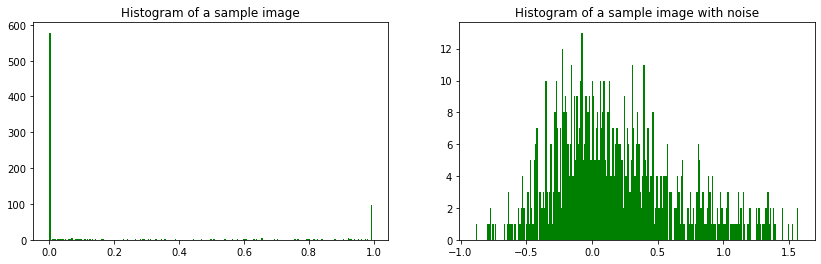

In [122]:
def P9():

### STUDENT END ###

# I firstly directly use Guassian Naive Bayes: 

    model = GaussianNB()
    model.fit(mini_train_data, mini_train_labels)
    accuracy = model.score(dev_data,dev_labels)
    print ('Accuracy of Gaussian NB: {0:.3f}'.format(accuracy))

# Solution 1:    
# The above accuracy is only 0.593. 
# We can use var_smoothingfloat parameter in the GaussianNB(),
# that is, add portion of the largest variance of all features to 
# variances for calculation stability. To find the best accuracy 
# I perform the following computation:  

    var_smoothing_value = np.arange(1e-9, 1.00, 0.01)
    accuracies = []
    for i in var_smoothing_value:
        model = GaussianNB(var_smoothing=i)
        model.fit(mini_train_data, mini_train_labels)
        score = model.score(dev_data,dev_labels)
        accuracies = np.append(accuracies, score)
    max_acc = np.argmax(accuracies, axis=0)
    optimal_var_smoothing = var_smoothing_value[max_acc]
    print ('===== solution 1 ======')
    print ('the optimal value of var_smoothing is : {0:.3f}'.format(optimal_var_smoothing))
    model = GaussianNB(var_smoothing = optimal_var_smoothing)
    model.fit(mini_train_data, mini_train_labels)
    accuracy = model.score(dev_data,dev_labels)
    print ('Accuracy of enhanced Gaussian NB: {0:.3f}'.format(accuracy))

# Solution 2:  
# The GaussianNB() model expects normally distributed input 
# features, but the pixel data are almost binary. By plotting the histogram of a sample digit,  
# we can observe adding gaussian noise can transform the distribution 
# to a more normal-distribution-like shape.
    
    index = np.random.choice(mini_train_data.shape[0])
    sample_img = mini_train_data[index]
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    fig = plt.hist(sample_img, 250, color='green') 
    plt.title('Histogram of a sample image')
    plt.subplot(1, 2, 2)
    fig = plt.hist(sample_img + np.random.normal(0, 0.3, sample_img.shape),250, color='green')
    plt.title('Histogram of a sample image with noise')


# Below I search the best sigma:  

    sigmas = np.arange(0.00, 1.00, 0.01)
    accuracies = []
    for i in sigmas:
        new_train_data = mini_train_data + np.random.normal(0, i, mini_train_data.shape)
        new_dev_data = dev_data + np.random.normal(0, i, mini_train_data.shape)
        model.fit(new_train_data, mini_train_labels)
        score = model.score(new_dev_data, dev_labels)
        accuracies = np.append(accuracies, score)
    max_acc = np.argmax(accuracies, axis=0)
    sigma = sigmas[max_acc]
    print ('===== solution 2 ======')
    print ('The optimal value of sigma: {0:.2f}'.format(sigma))
    new_train_data = mini_train_data + np.random.normal(0, sigma, mini_train_data.shape)
    new_dev_data = dev_data + np.random.normal(0, sigma, mini_train_data.shape)

    model.fit(new_train_data, mini_train_labels)
    accuracy = model.score(new_dev_data,dev_labels)
    print ('Accuracy of enhanced Gaussian NB: {0:.3f}'.format(accuracy))
    return model

### STUDENT END ###

P9()

ANSWER:

I proposed 2 solutions as the follows: 

Solution 1: We can use var_smoothingfloat parameter in the GaussianNB(),that is, add portion of the largest variance of all features to variances for calculation stability. To find the best accuracy 
 
Solution 2: The GaussianNB() model expects normally distributed input features, but the pixel data are almost binary. By plotting the histogram of a sample digit,  we can observe adding gaussian noise can transform the distribution to a more normal-distribution-like shape. By manually adding gaussian noise, the features of the preprocessed images follow a distribution closer to normality, and the accuracy is improved.

The results of solution 1 and solution 2 are very close to each other. 

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

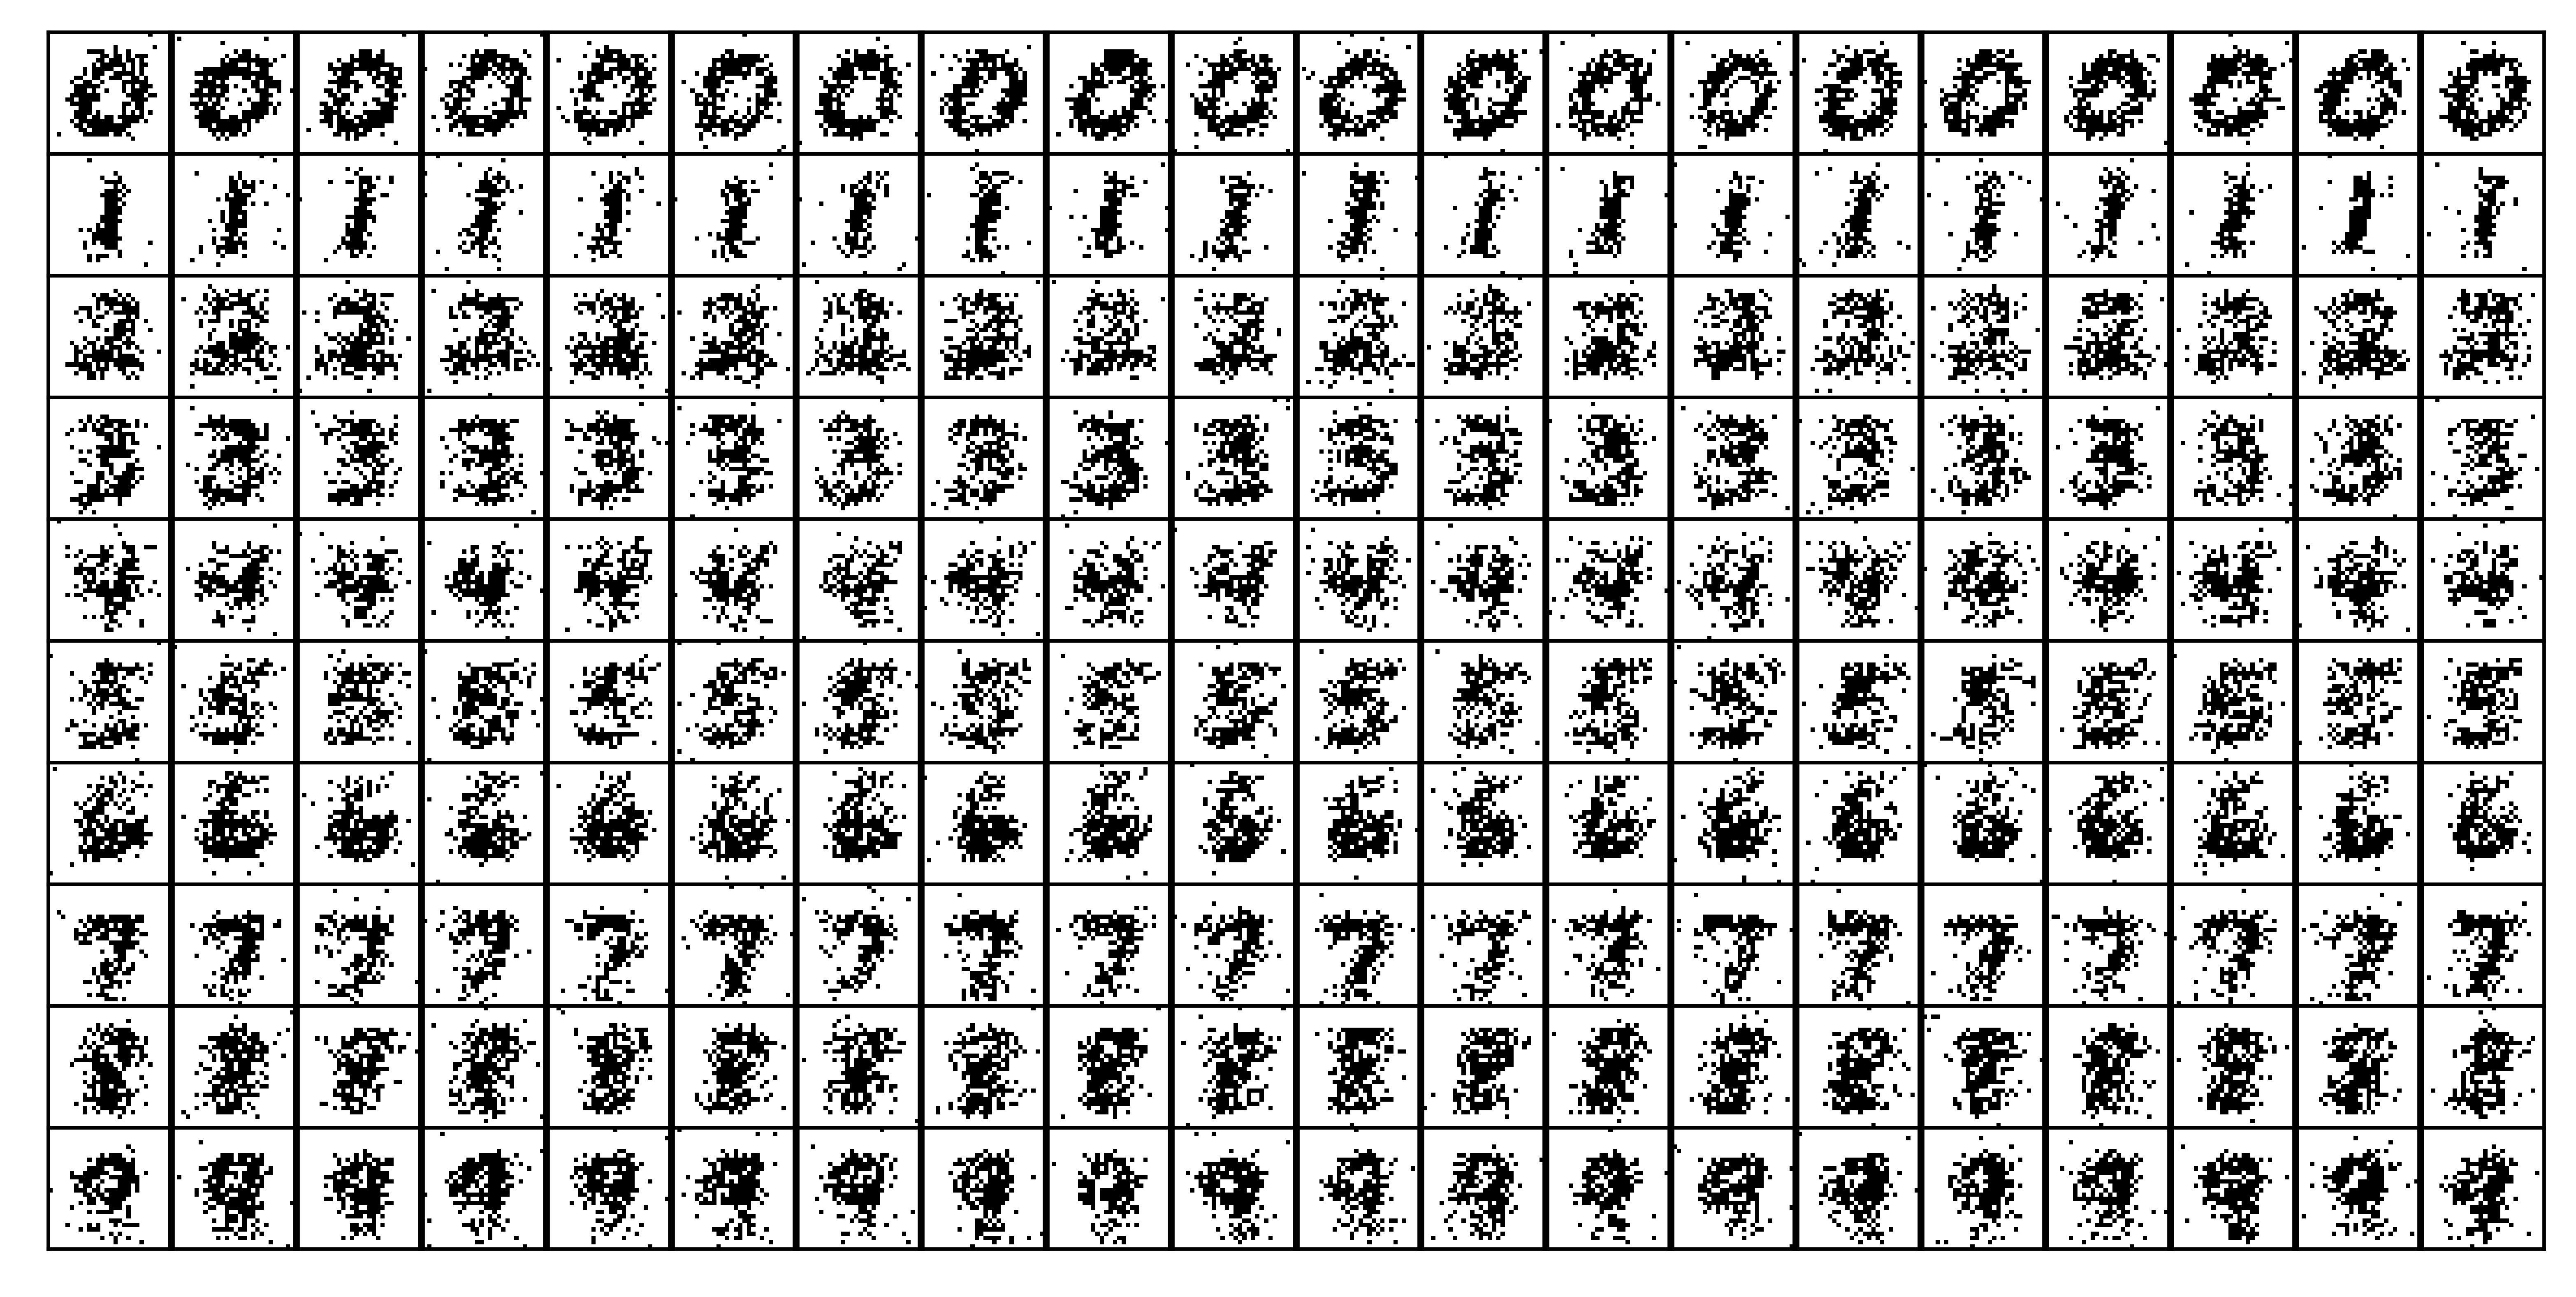

In [132]:
def P10(num_examples):

### STUDENT START ###
    dim = int(np.sqrt(X.shape[1]))
    model = BernoulliNB(binarize=0)
    model.fit(mini_train_data, mini_train_labels)
    
    probs = np.exp(model.feature_log_prob_)
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(10, 5), dpi=X.shape[1])

    # For each digit (from 0 to 9)
    for i in range(len(np.unique(Y))):
        for j in range(num_examples):
            example = np.where(probs[i,:]>np.random.rand(X.shape[1]),1,0)

            plt.subplot(len(np.unique(Y)), num_examples, i*num_examples+j+1)
            plt.imshow(example.reshape((dim,dim)))
            plt.subplots_adjust(wspace=0, hspace=0)
            ax = plt.gca()
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
        
### STUDENT END ###

P10(20)

ANSWER:

The generated digits can be easily recongnized with no confusion. The quality of the image look much blurry than the real digits, but overall they are very similar to what the digits should look like. In general, It gives the concept of a general pattern, that is, which pixels should be in each digit. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

bucket is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
bucket is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
bucket is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
bucket is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
bucket is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
bucket is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
bucket is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
bucket is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
bucket is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


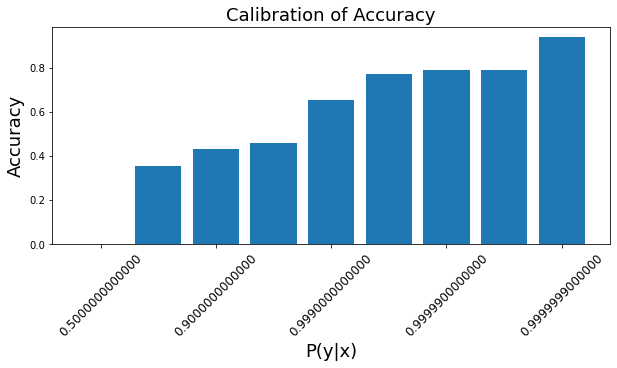

In [156]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    model = BernoulliNB(alpha=nb.best_params_['alpha'], binarize=0)
    model.fit(mini_train_data, mini_train_labels)
    
    pred_labels = model.predict(dev_data)
    pred_probs = model.predict_proba(dev_data)
        
    b = list(buckets)
    b.insert(0, 0.)
    
    acc = [0.]*len(buckets)
    for i in range(1,len(buckets)+1):
        label_bucket = np.zeros(pred_labels.shape[0])
        num_correct = 0
        num_total = 0
        for j in range(pred_probs.shape[0]):
            prob = pred_probs[j, pred_probs[j].argmax()]
            label_bucket[j] = np.where((prob <= b[i]) & (prob > b[i-1]), 1, 0)
            if label_bucket[j] == 1:
                num_total +=1
                if pred_labels[j] == dev_labels[j]:
                    num_correct += 1
 
        correct[i-1] = float(num_correct)
        total[i-1] = float(num_total)
        if (total[i-1] > 0): acc[i-1] = correct[i-1] / total[i-1]

    buck = ["{:.13f}".format(i) for i in b]
    plt.figure(figsize=(10,4))
    fig = plt.bar(range(len(buckets)), acc)
    plt.title('Calibration of Accuracy', fontsize= 18)
    plt.xlabel('P(y|x)', fontsize= 18)
    plt.ylabel('Accuracy', fontsize= 18)
    ax = plt.gca()
    ax.set_xticklabels(buck, rotation=45, fontsize= 12)
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('bucket is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))



ANSWER: The ressults show that the above classifier is not perfectly calibrated. As shown in the graph: posterior and accuracy are not always positively correlated, in the figure the 2nd and 8th buckets corresponding to  P=0.9 and P=0.9999999999999. That is to say higher confidence does not always correspond with higher accuracy, so we cannot always infer something about the accuracy of the classifier given the posterior.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [23]:
# I have tried to add the features (1) summing the pixel values in each row; (2)summing 
# the pixel values in each column; (3) summing or averaging the pixel values in each 
# square block. Couldn't have enough time to figure out how to add the number of enclosed regions.


def P12():

### STUDENT START ###

    def sum_pixel(image):
        dim = int(np.sqrt(len(image)))
        ima = np.copy(image)
        for row in range(dim):
            subima = ima[row*dim : row*dim+dim]
            sumrow = np.sum(subima) 
            ima =np.append(ima, sumrow)  
        for col in range(dim):
            subima = ima[col*dim : col*dim+dim]
            sumcol = np.sum(subima) 
            ima =np.append(ima, sumcol)     
        blockdim = 4
        for row in range(blockdim):
            for col in range(blockdim):
                subblk = ima[row*col:row*col+blockdim]
                subblkcol = ima[col*blockdim:col*blockdim+blockdim]
                sumblk = np.sum(subblk) 
                ima =np.append(ima, sumblk)      
        return ima

    sumpix_train_data = np.apply_along_axis(sum_pixel, 1, mini_train_data)   

    print(sumpix_train_data.shape)
    
    model = BernoulliNB(binarize=0.2)
    model.fit(mini_train_data, mini_train_labels)
    score = model.score(mini_train_data, mini_train_labels)
    print ('Accuracy of old GaussianNB = {0}'.format(score))
    
    model.fit(sumpix_train_data, mini_train_labels)
    score = model.score(sumpix_train_data, mini_train_labels)
    print ('Accuracy of new GaussianNB = {0}'.format(score))
  
### STUDENT END ###

P12()

(1000, 856)
Accuracy of old GaussianNB = 0.851
Accuracy of new GaussianNB = 0.854


ANSWER: 

I have tried to add the features (1) summing the pixel values in each row; (2)summing the pixel values in each column; (3) summing or averaging the pixel values in each  square block. Couldn't have enough time to figure out how to add the number of enclosed regions.

After adding the new features, the accuracy has been imporved. 
